In [92]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [94]:
%pip install urllib3 --upgrade 
%pip install requests --upgrade 
%pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [95]:
# setup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import numpy as np
import timeit
import pandas as pd
from operator import itemgetter
import time
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

os.environ['SPOTIPY_CLIENT_ID'] = '3191e7e8b04e46c1af64f49bcdd020be'
os.environ['SPOTIPY_CLIENT_SECRET'] = '88dc925eff0d4006bb6d0b9b2401ac59'

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

scaler = StandardScaler()

In [56]:
# User's 5 chosen tracks:
# Toxic, Promiscuous, Sk8er Boi, Run It!, Your Love Is My Drug
track_uris = ["spotify:track:6I9VzXrHxO9rA9A5euc8Ak", "spotify:track:2gam98EZKrF9XuOkU13ApN", "spotify:track:4omisSlTk6Dsq2iQD7MA07", "spotify:track:7xYnUQigPoIDAMPVK79NEq", "spotify:track:3uoQULcUWfnt6nc6J7Vgai"]
# Limitless, Boneless, Astro Funk, Renegade, Tie Dye Sky
# track_uris = ['spotify:track:44ib3nlda2rBy0qmMUelnd', 'spotify:track:5PZI5xTcMq8FsCcEroth7S', 'spotify:track:7wRzUAw0Npu4CalkDIFHJE', 'spotify:track:34VvEULRDeVXiaCRsUebKg', 'spotify:track:2YZSTgWXEyDPUeKop4eiWo']
# This Hell
sample_uri = '7aHmvUghK3XCEqNRbUeAn4'

In [57]:
# Get audio features for user's chosen tracks from Spotify API
chosen_features = sp.audio_features([sample_uri] + track_uris)

In [60]:
# Get audio features for user's recommended tracks from Spotify API
recommendations_uris = pd.DataFrame(sp.recommendations(seed_tracks=track_uris, limit=100)['tracks'])['uri']
recomendations_features = sp.audio_features(recommendations_uris)

<AxesSubplot:ylabel='Density'>

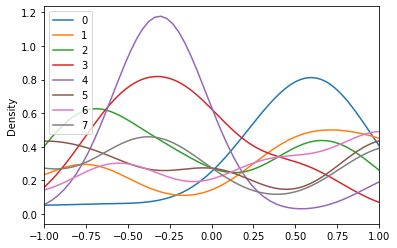

In [75]:
# Create list of all features favoring chosen features
chosen_features_weight = 100
all_features = pd.DataFrame([chosen_features[0]] + chosen_features[1:] * chosen_features_weight + recomendations_features)
all_features = all_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)

scaler.fit(all_features)
all_features = pd.DataFrame(scaler.transform(all_features))

usable_features = all_features.loc[1:]

usable_features.plot.kde(xlim=[-1,1])

In [76]:
# run gaussian kde on 105 songs (zeroth song is the comparison song, 1-5 are user selected, 6-105 are user recommendations)
gkde = stats.gaussian_kde(usable_features[1:].T)

In [77]:
# get sample song's normalized features
sample = all_features.loc[0]
print(gkde.evaluate(sample))

[0.00025491]


In [91]:
sample = all_features.loc[1]
print(gkde.evaluate(sample))

[0.04123487]


In [ ]:
# instead of including sample in standardization, just use the mean and stddev of the rest of the data to standardize the sample
# sample - mean / stddev
# try checking evaluation values to get intuition if it's working
# text friends for list of 1-5 songs that they want to hear
# simulate an example of sorting the list according to these peoples' utility with maximin principle
## compute the utility of each song for each person
## a utility for a list for a person is just the sum of their utilities
## figure out how to account for energy curve - compute difference squared between two curves
## dynamic programming maximin sort - look for algorithms so I don't have to invent something
# get popularity? other features besides audio features?

In [64]:
# chosen_features_weight = 100
# all_features = pd.DataFrame(chosen_features * chosen_features_weight + recomendations_features)
# usable_features = all_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)

# scaler.fit(usable_features)
# usable_features = pd.DataFrame(scaler.transform(usable_features))

# usable_features.plot.kde(xlim=[-1,1])

In [65]:
# old version without transform
# chosen_features_weight = 100
# all_features = pd.DataFrame(chosen_features * chosen_features_weight + recomendations_features)

# usable_features = all_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
# usable_features['tempo'] = (usable_features['tempo'] - 50) / 150

# usable_features.plot.kde(xlim=[0,1])

In [66]:
# try running PCA on the features
# try computing the average euclidian distance or cosine distance from a new song vectors to all previous song vectors
# z scoring - subtract mean, divide by std dev, maps everything from -1,1
# look at scipy.scale
# run the scipy function on each feature individually
# for a new song, get the probability values for each feature individually then multiply them together

In [67]:
pca = PCA(n_components=2)
pc = pca.fit_transform(usable_features)

finalDf = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, usable_features[['class']]], axis = 1)


Text(0, 0.5, 'pc2')

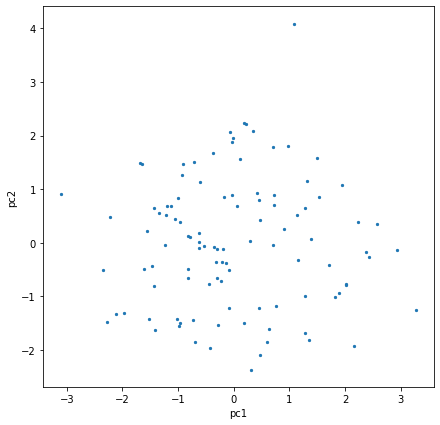

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [ ]:
import scipy
scipy.spatial.distance.cosine